## API Authentication
The package `tweepy` is great at handling all the Twitter API OAuth Authentication details for you. All you need to do is pass it your authentication credentials. In this interactive exercise, we have created some mock authentication credentials (if you wanted to replicate this at home, you would need to create a [Twitter App][1] as Hugo detailed in the video). Your task is to pass these credentials to tweepy's OAuth handler.

[1]:https://apps.twitter.com/

In [1]:
# Import package
import tweepy, json

# Store OAuth authentication credentials in relevant variables
access_token = "1094646687107301376-TPirJyfrlt3ABFSOz0RVKBQciVL0BM"
access_token_secret = "BOvWA8gVbrSGrPqXxAB7AGhCNUnZJdjhnRuavJmInqIxO"
consumer_key = "bPxnW5kli4FBZaTPkvUlqqDGX"
consumer_secret = "OmIXyGLMcpTyqJfNY528AlCugFbccFUREGfci8NmiKJ0uNoyCe"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

print(auth)

In [30]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 50000:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

## Streaming tweets
Now that you have set up your authentication credentials, it is time to stream some tweets! We have already defined the tweet stream listener class, `MyStreamListener`, just as Hugo did in the introductory video. You can find the code for the tweet stream listener class [here][1].

Your task is to create the `Streamobject` and to filter tweets according to particular keywords.

[1]:https://gist.github.com/hugobowne/18f1c0c0709ed1a52dc5bcd462ac69f4

In [31]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton','trump','bolsonaro','uribe','maduro','guaido'])

ProtocolError: ('Connection broken: IncompleteRead(0 bytes read)', IncompleteRead(0 bytes read))

## Load and explore your Twitter data
Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! This is what you'll do in the next few interactive exercises. In this exercise, you'll read the Twitter data into a list: `tweets_data`.

In [32]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])


In [33]:
# Print the info of the first tweet dict
tweets_data[0]

{'created_at': 'Sun Feb 10 18:36:43 +0000 2019',
 'id': 1094666488533999616,
 'id_str': '1094666488533999616',
 'text': '😂😂😂😂😂',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 2408412340,
  'id_str': '2408412340',
  'name': 'Sandro Karam',
  'screen_name': 'KaramSandro',
  'location': 'fortaleza/ce',
  'url': None,
  'description': 'Se A é o sucesso, então A é igual a X mais Y mais Z. O trabalho é X; Y é o lazer; e Z é manter a boca fechada. Eisten',
  'translator_type': 'regular',
  'protected': False,
  'verified': False,
  'followers_count': 264,
  'friends_count': 238,
  'listed_count': 0,
  'favourites_count': 12133,
  'statuses_count': 8086,
  'created_at': 'Thu Mar 13 20:18:27 +0000 2014',
  'utc_offset': None,
  'time_zone': No

## Twitter data to DataFrame
Now you have the Twitter data in a list of dictionaries, `tweets_data`, where each dictionary corresponds to a single tweet. Next, you're going to extract the text and language of each tweet. The text in a tweet, `t1`, is stored as the value `t1['text']`; similarly, the language is stored in `t1['lang']`. Your task is to build a DataFrame in which each row is a tweet and the columns are `'text'` and `'lang'`.

In [34]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text','lang'])

# Print head of DataFrame
df.head()

text lang
0                                              😂😂😂😂😂  und
1  Border-Security Advocates Join Trump’s ‘Human ...   en
2  RT @cinefilo_K: Governo Bolsonaro está tratand...   pt
3  RT @JustCurious37: And this is really upsettin...   en
4  RT @Helenasth: No dia em que a Folha estampa m...   pt

## A little bit of Twitter text analysis
Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words `'clinton'`,`'trump'`,`'bolsonaro'`,`'uribe'`,`'maduro'` and `'guaido'`. In the pre-exercise code, we have defined the following function `word_in_text()`, which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).
```python
import re

def word_in_text(word, text):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)

    if match:
        return True
    return False
```
You're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of objects for each candidate has been initialized to 0.

In [35]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [36]:
# Initialize list to store tweet counts
[clinton,trump,bolsonaro,uribe,maduro,guaido] = [0, 0, 0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton   += word_in_text('clinton', row['text'])
    trump     += word_in_text('trump', row['text'])
    bolsonaro += word_in_text('bolsonaro', row['text'])
    uribe     += word_in_text('uribe', row['text'])
    maduro    += word_in_text('maduro', row['text'])
    guaido    += word_in_text('guaido', row['text'])    

## Plotting your Twitter data
Now that you have the number of tweets that each person was mentioned in, you can plot a bar chart of this data. You'll use the statistical data visualization library [`seaborn`][1], which you may not have seen before, but we'll guide you through. You'll first import `seaborn` as `sns`. You'll then construct a barplot of the data using `sns.barplot`, passing it two arguments:

* a list of labels and
* a list containing the variables you wish to plot (`clinton`, `trump` and so on.)

[1]:https://stanford.edu/~mwaskom/software/seaborn/

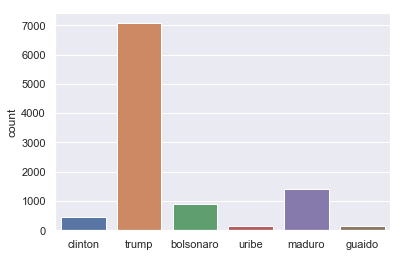

In [37]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton','trump','bolsonaro','uribe','maduro','guaido']

# Plot histogram
ax = sns.barplot(cd, [clinton,trump,bolsonaro,uribe,maduro,guaido])
ax.set(ylabel="count")
plt.show()

In [41]:
totalTweets = clinton+trump+bolsonaro+uribe+maduro+guaido
print(totalTweets)

10095
